In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


In [39]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [ ]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.01) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.01) # transmission rate array

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

Dataset size: 72


100%|██████████| 9/9 [02:31<00:00, 16.79s/it]


In [ ]:
dataset.to_csv('../data/network_model_dataset_7200.csv')

In [37]:
dataset

,beta,gamma,delta,init_inf_frac,alpha,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
0,0.1,0.3,0.2,0.0001,0.2,0.0,6.0,14.0,17.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.3,0.2,0.0001,0.3,0.0,15.0,32.0,28.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.3,0.2,0.0001,0.4,0.0,25.0,47.0,61.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1,0.3,0.2,0.0001,0.5,0.0,41.0,58.0,74.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1,0.3,0.2,0.0001,0.6,0.0,33.0,68.0,63.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.9,0.3,0.2,0.0001,0.5,0.0,152.0,289.0,326.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.9,0.3,0.2,0.0001,0.6,0.0,224.0,447.0,592.0,729.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.9,0.3,0.2,0.0001,0.7,0.0,259.0,491.0,697.0,902.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.9,0.3,0.2,0.0001,0.8,0.0,386.0,835.0,1284.0,1815.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


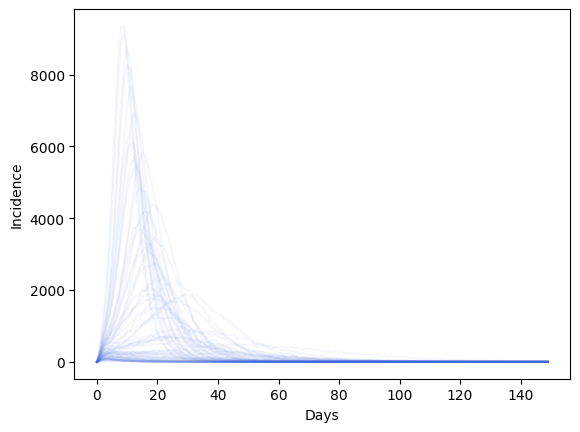

In [38]:
for i in range(len(dataset)):
    plt.plot(dataset.values[i][5:], color='RoyalBlue', alpha=0.05)

plt.xlabel('Days')
plt.ylabel('Incidence')
plt.savefig('../figures/train_curves_small.png', dpi=600, bbox_inches='tight')

R_0 =  1.0


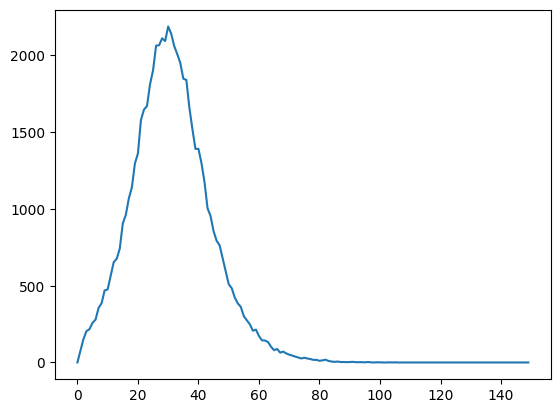

In [34]:
beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected
print('R_0 = ', beta/delta)

res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
plt.plot(res.daily_incidence)